In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, recall_score, f1_score, precision_score
from sklearn.utils.class_weight import compute_class_weight

In [334]:
#Load Dataset
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [335]:
#Checks number of unique values from all of the object datatype

df.select_dtypes(include='object').nunique()

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

In [336]:
# Remove 'customerID' column because it only shows customer id number

df.drop(columns='customerID', inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [337]:
cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
            'MultipleLines', 'InternetService', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'Churn', 'tenure']

# Replace empty values for total charges with NaN (Not a number)

df['TotalCharges'] = df['TotalCharges'].replace('', float('nan'))

# Convert the column to numeric, replacing non-numeric values with Nan 

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Change 'Total Charges' datatypes into float

df['TotalCharges'] = df['TotalCharges'].astype(float)

# Ensure 'tenure' is numeric
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# Fill missing or invalid values in 'tenure'
df['tenure'] = df['tenure'].fillna(0)

# Convert tenure from numerical to categorical
df['tenure'] = df['tenure'].astype('object')

# Categorize tenure into Short, Medium, Long, Very Long
df['tenure'] = pd.cut(
    df['tenure'], 
    bins=[0, 12, 36, 72, 73], 
    labels=['Short', 'Medium', 'Long', 'Very Long'], 
    right=False
)

# Feature interactions
df['MonthlyCharges_Contract'] = df['MonthlyCharges'] * df['Contract'].apply(lambda x: 1 if x == 'One year' else 0)
df['TotalCharges_Contract'] = df['TotalCharges'] * df['Contract'].apply(lambda x: 1 if x == 'Two year' else 0)


df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Contract,TotalCharges_Contract
0,Female,0,Yes,No,Short,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.00,0.0
1,Male,0,No,No,Medium,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,56.95,0.0
2,Male,0,No,No,Short,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.00,0.0
3,Male,0,No,No,Long,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,42.30,0.0
4,Female,0,No,No,Short,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.00,0.0


In [338]:
#Replace values with No phone service with No

for col in cols:
    if df[col].eq('No phone service').any():
        df[col] = df[col].replace({'No phone service' : 'No'})
        
#Replace values with No internet service with No

for col in cols:
    if df[col].eq('No internet service').any():
        df[col] = df[col].replace({'No internet service' : 'No'})
        
df.select_dtypes(include='object').nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       2
InternetService     3
OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
StreamingTV         2
StreamingMovies     2
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [339]:
# Exploratory Data Analysis

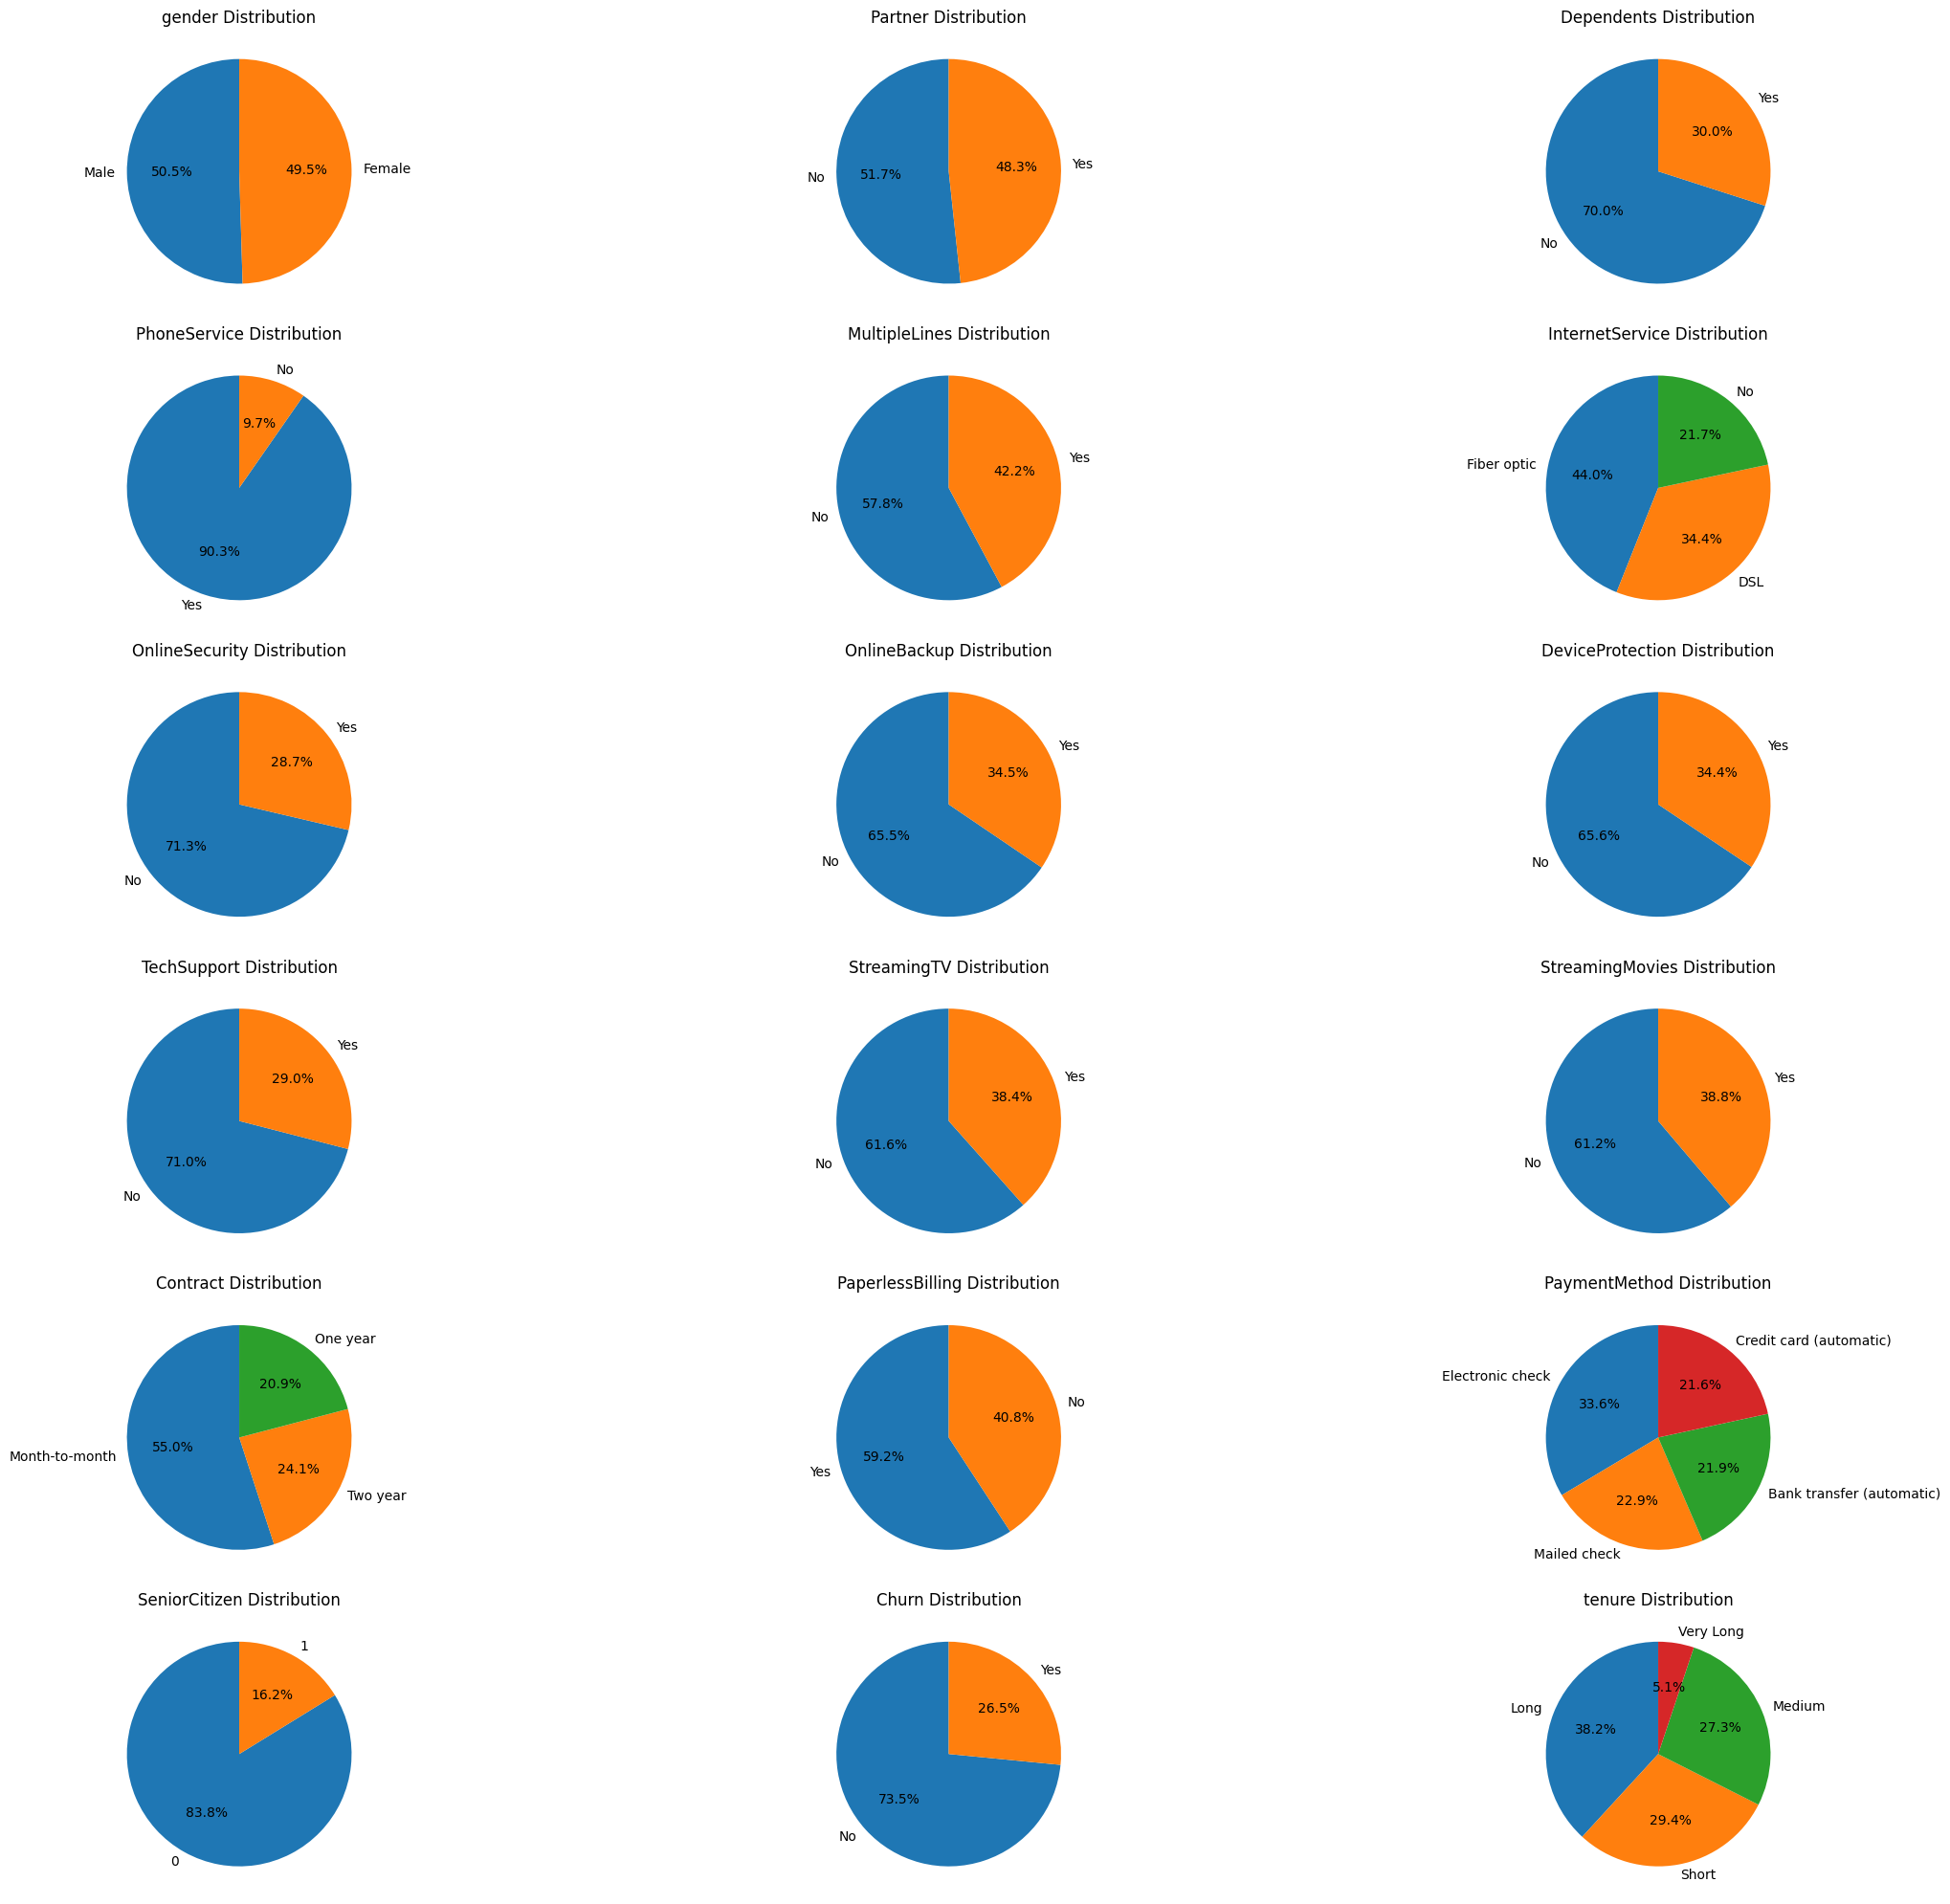

In [340]:
# Create figure with subplots

fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(25, 20))

# Create pie chart for each categorical variable
for i, var in enumerate(cols):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        col_counts = df[var].value_counts()

        # Create a pie chart
        axs.flat[i].pie(col_counts, labels=col_counts.index, autopct= '%1.1f%%', startangle=90)

        # Set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# Adjust spacing between subplots

fig.tight_layout()

# Show the plot
plt.show()

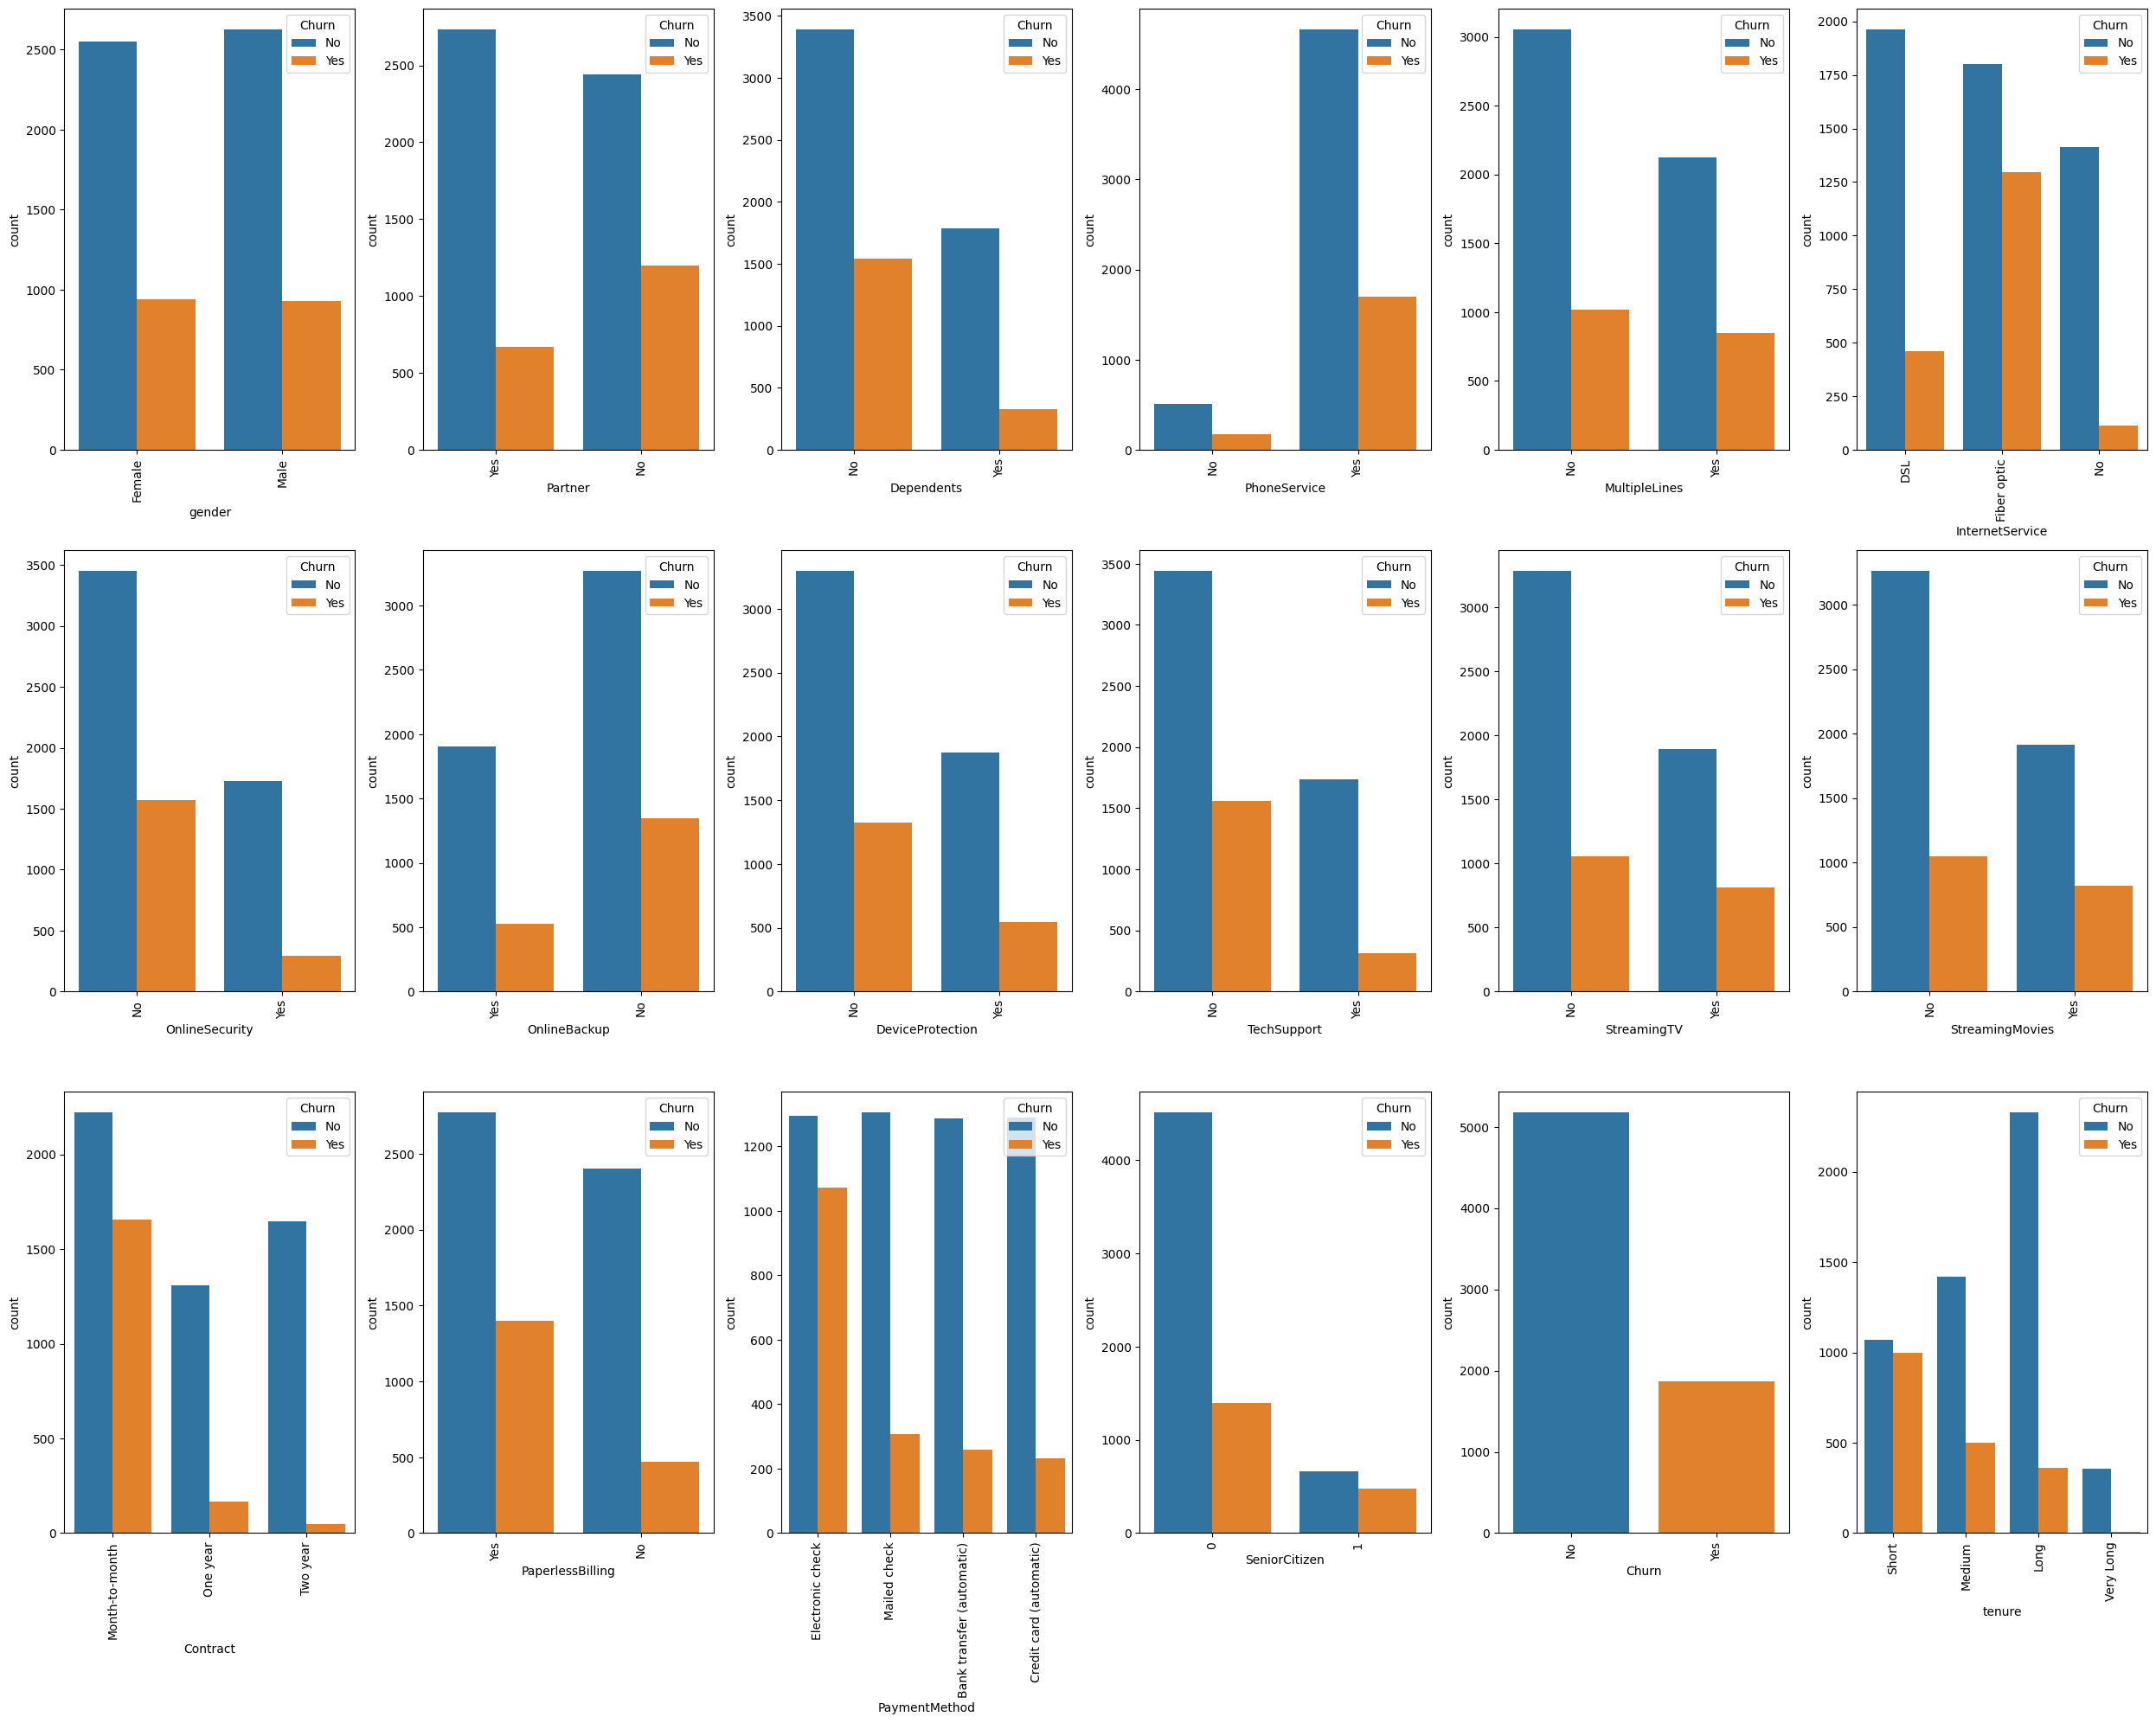

In [341]:
# Create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(25, 20))
axs = axs.flatten()

# Create barplot for each categorical variable
for i, var in enumerate(cols):
    sns.countplot(x=var, hue='Churn', data=df, ax=axs[i])
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis tick labels

# Adjust spacing between subplots
fig.tight_layout(pad=1.0)

# Show plot
plt.show()

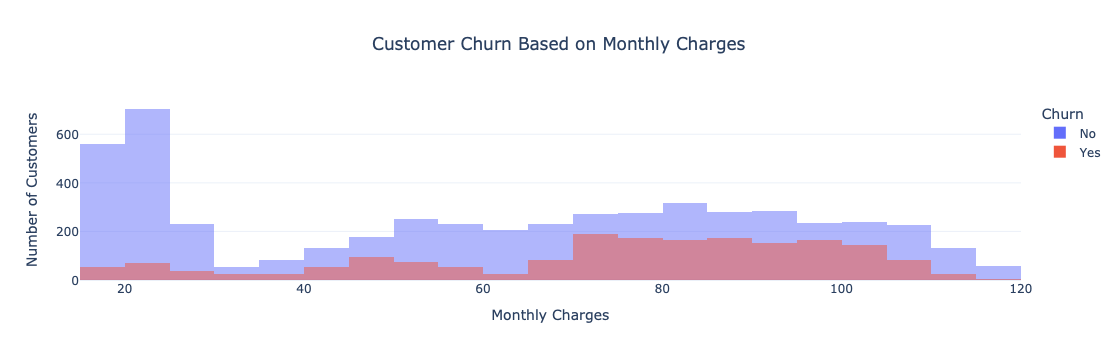

In [356]:

# Create the histogram 
fig = px.histogram(df,x='MonthlyCharges',color='Churn',nbins=30,  barmode='overlay',  title='Customer Churn Based on Monthly Charges')

# Update layout for clarity
fig.update_layout(xaxis_title="Monthly Charges",yaxis_title="Number of Customers",legend_title="Churn",template="plotly_white", title_x=0.5)

# Show plot
fig.show()


In [343]:
#Data Preprocessing

In [344]:
# Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

TotalCharges             0.156183
TotalCharges_Contract    0.156183
dtype: float64

In [345]:
# Fill null value in 'TotalCharges' with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

#Calculate mean from training set
mean_value = df['TotalCharges_Contract'].mean()

# Fill missing values in both training and testing datasets
df['TotalCharges_Contract'] = df['TotalCharges_Contract'].fillna(mean_value)

In [346]:
# Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [347]:
#Finalize num data
int_df = df[['MonthlyCharges', 'TotalCharges', 'MonthlyCharges_Contract', 'TotalCharges_Contract']]
int_df

,MonthlyCharges,TotalCharges,MonthlyCharges_Contract,TotalCharges_Contract
0,29.85,29.85,0.00,0.0
1,56.95,1889.50,56.95,0.0
2,53.85,108.15,0.00,0.0
3,42.30,1840.75,42.30,0.0
4,70.70,151.65,0.00,0.0
...,...,...,...,...
7038,84.80,1990.50,84.80,0.0
7039,103.20,7362.90,103.20,0.0
7040,29.60,346.45,0.00,0.0
7041,74.40,306.60,0.00,0.0


In [348]:
#Finalize cat data
encoded_df = pd.get_dummies( df[['gender', 'Partner', 'Dependents', 'tenure', 'PhoneService', 
            'MultipleLines', 'InternetService', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'Churn']], drop_first = True)

encoded_df.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,tenure_Medium,tenure_Long,tenure_Very Long,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,True,False,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,True,False,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,0,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,True,False,True


In [349]:
#Combine num/cat data into one final clean dataset
df_final = pd.concat([int_df, encoded_df], axis=1)
df_final.head()

,MonthlyCharges,TotalCharges,MonthlyCharges_Contract,TotalCharges_Contract,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,tenure_Medium,tenure_Long,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,29.85,29.85,0.00,0.0,0,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,56.95,1889.50,56.95,0.0,0,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,53.85,108.15,0.00,0.0,0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,42.30,1840.75,42.30,0.0,0,True,False,False,False,True,...,True,False,False,True,False,False,False,False,False,False
4,70.70,151.65,0.00,0.0,0,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


In [350]:
if df_final['TotalCharges'].eq(' ').any():
    df_final['TotalCharges'] = df_final['TotalCharges'].replace({' ': 0})


In [351]:

X = df_final.drop(['Churn_Yes'], axis=1)
y = df_final['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

mms = MinMaxScaler(feature_range=(0,1))

Xtrain = mms.fit_transform(X_train)
Xtest = mms.fit_transform(X_test)
Xtrain = pd.DataFrame(X_train)
Xtest = pd.DataFrame(X_test)

Results = {'Model':[], 'Accuracy':[], 'Recall':[], 'Precision':[], 'F1':[]  }

Results = pd.DataFrame(Results)


In [352]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharges                         7043 non-null   float64
 1   TotalCharges                           7043 non-null   float64
 2   MonthlyCharges_Contract                7043 non-null   float64
 3   TotalCharges_Contract                  7043 non-null   float64
 4   SeniorCitizen                          7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   tenure_Medium                          7043 non-null   bool   
 9   tenure_Long                            7043 non-null   bool   
 10  tenure_Very Long                       7043 non-null   bool   
 11  Phon

In [354]:

# Initialize models with necessary adjustments
LRModel = LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear')
DTModel = DecisionTreeClassifier()
RFModel = RandomForestClassifier()
KNNModel = KNeighborsClassifier(n_neighbors=5)
SVModel = SVC()

model = [LRModel, DTModel, RFModel, KNNModel, SVModel]

# Initialize Results with the correct structure but no rows
Results = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1'])

for models in model:
    models.fit(Xtrain, y_train)
    ypred = models.predict(Xtest)

    # Calculate metrics with zero_division to handle undefined precision/recall
    accuracy = round(accuracy_score(y_test, ypred), 2)
    precision = round(precision_score(y_test, ypred, zero_division=0), 2)
    recall = round(recall_score(y_test, ypred, zero_division=0), 2)
    f1 = round(f1_score(y_test, ypred, zero_division=0), 2)

    print('Model:', type(models).__name__)
    print('Confusion Matrix:', confusion_matrix(y_test, ypred))
    print('Classification Report:', classification_report(y_test, ypred, zero_division=0))
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1:', f1)
    print()

    # Create a new row for Results
    new_row = pd.DataFrame({
        'Model': [type(models).__name__],
        'Accuracy': [accuracy],
        'Recall': [recall],
        'Precision': [precision],
        'F1': [f1]
    })

    # Ensure `new_row` and `Results` are free of all-NA rows and columns
    new_row = new_row.dropna(axis=1, how='all').dropna(axis=0, how='all')
    Results = Results.dropna(axis=1, how='all').dropna(axis=0, how='all')

    # Align column types between Results and new_row
    for col in Results.columns:
        if col not in new_row.columns:
            new_row[col] = pd.NA  # Ensure structural alignment

    # Skip concatenation if `new_row` is still invalid
    if not new_row.empty:
        Results = pd.concat([Results, new_row], ignore_index=True)

# Display best models
max_accuracy = Results['Accuracy'].idxmax()
max_precision = Results['Precision'].idxmax()
max_recall = Results['Recall'].idxmax()
max_f1 = Results['F1'].idxmax()

print('Best Accuracy Model:', Results.loc[max_accuracy]['Model'])
print('Best Precision Model:', Results.loc[max_precision]['Model'])
print('Best Recall Model:', Results.loc[max_recall]['Model'])
print('Best F1 Model:', Results.loc[max_f1]['Model'])


Model: LogisticRegression
Confusion Matrix: [[1116  423]
 [ 100  474]]
Classification Report:               precision    recall  f1-score   support

       False       0.92      0.73      0.81      1539
        True       0.53      0.83      0.64       574

    accuracy                           0.75      2113
   macro avg       0.72      0.78      0.73      2113
weighted avg       0.81      0.75      0.77      2113

Accuracy: 0.75
Precision: 0.53
Recall: 0.83
F1: 0.64

Model: DecisionTreeClassifier
Confusion Matrix: [[1244  295]
 [ 286  288]]
Classification Report:               precision    recall  f1-score   support

       False       0.81      0.81      0.81      1539
        True       0.49      0.50      0.50       574

    accuracy                           0.73      2113
   macro avg       0.65      0.66      0.65      2113
weighted avg       0.73      0.73      0.73      2113

Accuracy: 0.73
Precision: 0.49
Recall: 0.5
F1: 0.5

Model: RandomForestClassifier
Confusion Matrix: 